# Give me some credit

### Machine Learning - 2018/2019

### Parte 1

Gerardo Ramis y Álvaro Rodríguez.

#### Introducción


Una de las principales decisiones y riesgos que tiene que asumir un banco en el desarrollo de su actividad habitual es decidir quién puede obtener financiamiento y en qué términos. Esta responsabilidad es especialmente importante puesto que además, para que los mercados y la sociedad funcionen, los individuos y las empresas necesitan acceso al crédito.

Los algoritmos de calificación crediticia, que adivinan la probabilidad de incumplimiento, son el método que utilizan los bancos para determinar si se debe otorgar o no un préstamo.

Se disponen de datos históricos sobre 250,000 prestatarios.

El objetivo es **predecir la probabilidad de que alguien experimente dificultades financieras en los próximos dos años**. 

Los datos están disponibles en "Kaggle" (https://www.kaggle.com/c/GiveMeSomeCredit).

Una vez llevado a cabo el análisis exploratorio, tratamiento de datos y estimación de modelos de predicción, los resultados definitivos sobre la muestra de test serán subidos a "Kaggle" como parte de la competición "Give me some credit".


#### KPIs

Antes de nada, debemos de definir el indicador o indicadores que nos ayudarán a evaluar el desempeño de los modelos y su verdadera repercusión para la compañía en términos de negocio (a diferencia de las métricas).

- Tasa de morosidad (delinquecy rate).


#### Diccionario de datos

**1) SeriousDlqin2yrs**: La persona experimentó 90 días de morosidad vencida o mayor. Es nuestra variable target. 0/1. 


**2) RevolvingUtilizationOfUnsecuredLines**: Saldo total en tarjetas de crédito y líneas de crédito personales, excepto en bienes inmobiliarios y sin deuda a plazos, como préstamos para automóviles, dividida por la suma del porcentaje de límites de crédito. Porcentaje.


**3) age**: Edad del prestatario en años enteros. Número entero.


**4) NumberOfTime30-59DaysPastDueNotWorse**: Número de veces que el prestatario ha tenido créditos vencidos entre 30 y 59 días, pero no mayores moras en los últimos 2 años. Número entero.


**5) DebtRatio**: Pago mensual de la deuda, pensión alimenticia y costes de vida divididos por el porcentaje de ingresos brutos mensuales. Pocentaje.


**6) MonthlyIncome**: Ingreso mensual. Númerica.


**7) NumberOfOpenCreditLinesAndLoans**: Número de préstamos abiertos (pagos a plazos como préstamos para automóviles o hipotecas) y líneas de crédito (por ejemplo, tarjetas de crédito). Número entero.


**8) NumberOfTimes90DaysLate**: Número de veces que el prestatario ha tenido créditos vencidos 90 días o más. Número entero.


**9) NumberRealEstateLoansOrLines**: Número de préstamos hipotecarios y de bienes inmobiliarios, incluidas las líneas de crédito hipotecario. Número entero.


**10) NumberOfTime60-89DaysPastDueNotWorse**: Número de veces que el prestatario ha tenido créditos vencidos entre 60 y 89 días, no pero no mayores moras en los últimos 2 años. Número entero.


**11) NumberOfDependents**: Número de dependientes en la familia, excluyéndose a sí mismos (cónyuge, hijos, etc.). Número entero.

#### Paquetes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing,model_selection
import itertools
import xgboost as xgb
import graphviz
from collections import Counter

#### Carga de datos training

In [2]:
data = pd.read_csv('all/cs-training.csv').drop('Unnamed: 0', axis = 1) # carga del fichero training
data.head(5) # 5 primeras obs.

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
data.tail(5)  # 5 últimas obs.

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


In [4]:
cleanCol = []
for i in range(len(data.columns)):
    cleanCol.append(data.columns[i].replace('-', ''))
    
data.columns = cleanCol

In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime3059DaysPastDueNotWorse     150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime6089DaysPastDueNotWorse     150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


#### Carga de datos test

In [6]:
data_test = pd.read_csv('all/cs-test.csv').drop('Unnamed: 0', axis = 1) # carga del fichero training
data_test.head(5) # 5 primeras obs.

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,1,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,1,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [7]:
data_test.tail(5)  # 5 últimas obs.

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
101498,1,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,1,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,1,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,1,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0
101502,1,0.441842,29,0,0.198918,5916.0,12,0,0,0,0.0


In [8]:
cleanCol = []
for i in range(len(data.columns)):
    cleanCol.append(data.columns[i].replace('-', ''))
    
data_test.columns = cleanCol


In [9]:
data_test.info()
data_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 11 columns):
SeriousDlqin2yrs                        101503 non-null int64
RevolvingUtilizationOfUnsecuredLines    101503 non-null float64
age                                     101503 non-null int64
NumberOfTime3059DaysPastDueNotWorse     101503 non-null int64
DebtRatio                               101503 non-null float64
MonthlyIncome                           81400 non-null float64
NumberOfOpenCreditLinesAndLoans         101503 non-null int64
NumberOfTimes90DaysLate                 101503 non-null int64
NumberRealEstateLoansOrLines            101503 non-null int64
NumberOfTime6089DaysPastDueNotWorse     101503 non-null int64
NumberOfDependents                      98877 non-null float64
dtypes: float64(4), int64(7)
memory usage: 8.5 MB


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
count,101503.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,1.0,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,0.0,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.0,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,1.0,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.0,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


#### Análisis exploratorio de datos training

- Con respecto a NumberOfTimes90DaysLate, NumberofTime60-89DaysPastDueNotWorse, NumberofTime30-59DaysPasDueNotWorse observamos que hay 5 filas en las que cada una de ellas tiene un valor de 95, y 264 filas que tienen un valor de 98. Para el resto de la tabla de datos, estas variables tienen valores que varían de 0 a 20 aproximadamente. Además, todas estas filas tienen para RevolvingUtilizationOfUnssecuredLines el valor 0.9999999.


- RevolvingUtilizationOfUnssecuredLines también tiene muchas filas que parecen outliers. Esta variable se define en el diccionario de datos como un porcentaje. Por lo tanto, debe estar entre 0 y 1, pero ~ 2.5% de los datos de entrenamiento tienen valores que son> 1, y el valor máximo es más de 50000.

- MonthlyIncome tiene valores vacíos. Sin embargo, se podría optar por incluir los valores vacíos como una categoría de no declarados.


C:\Users\Alvaro_2\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


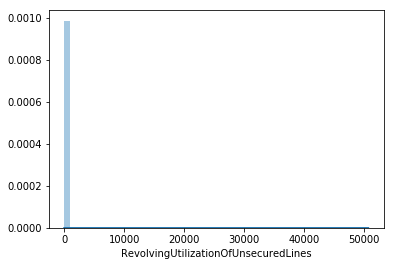

C:\Users\Alvaro_2\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


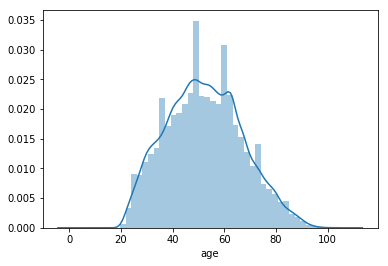

C:\Users\Alvaro_2\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


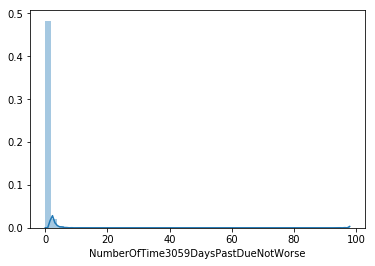

C:\Users\Alvaro_2\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


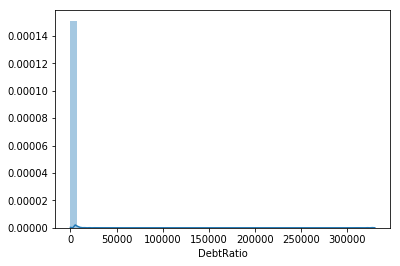

C:\Users\Alvaro_2\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


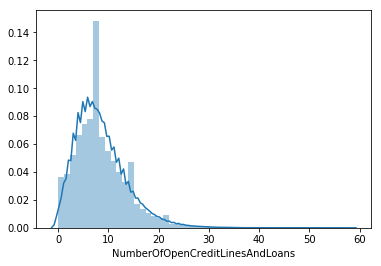

C:\Users\Alvaro_2\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


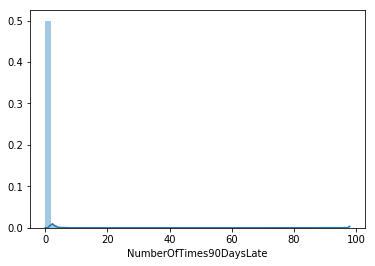

C:\Users\Alvaro_2\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


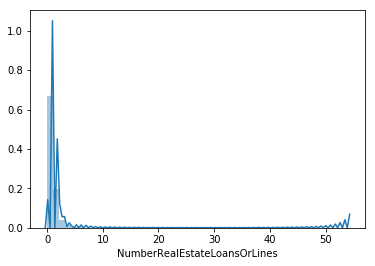

C:\Users\Alvaro_2\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


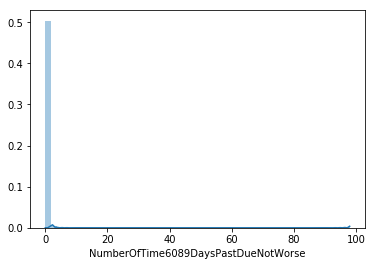

In [10]:
# remove ID, target variable Dlqin2yrs and variables with missing values
feature_list=list(data.columns.values)
remove_list = ["SeriousDlqin2yrs",'MonthlyIncome','NumberOfDependents']
for each in remove_list:
    feature_list.remove(each)

for each in feature_list:
    sns.distplot(data[each])
    plt.show()

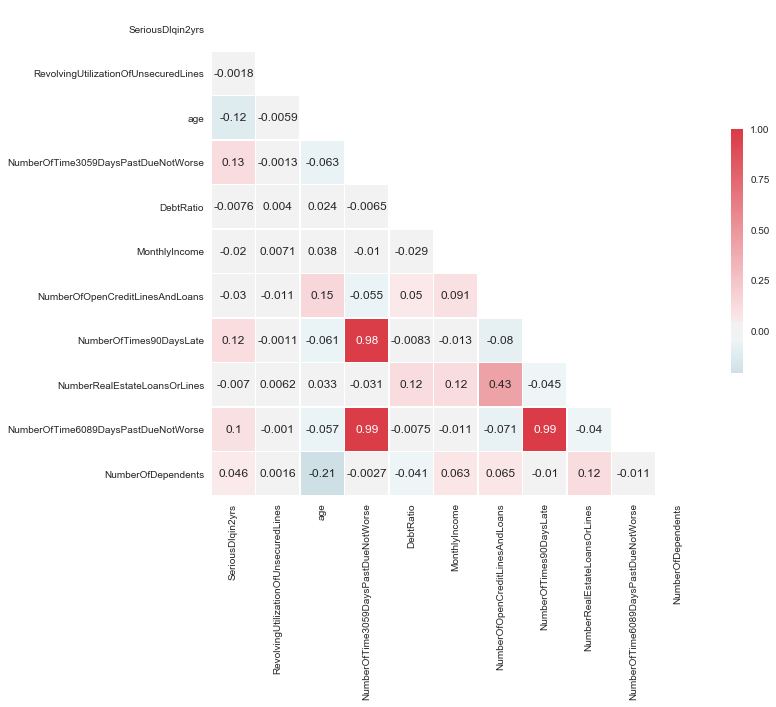

In [11]:
sns.set(style="white")

# Compute the correlation matrix #Se llaman igual el corr de training que el de test, ojo.
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### 1) Variable SeriousDlqin2yrs

In [12]:
# Variable target: SeriousDlqin2yrs

# frecuency function
def add_freq():
    ncount = len(data)

    ax2=ax.twinx()

    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')

    ax2.set_ylim(0,100)
    ax2.grid(None)


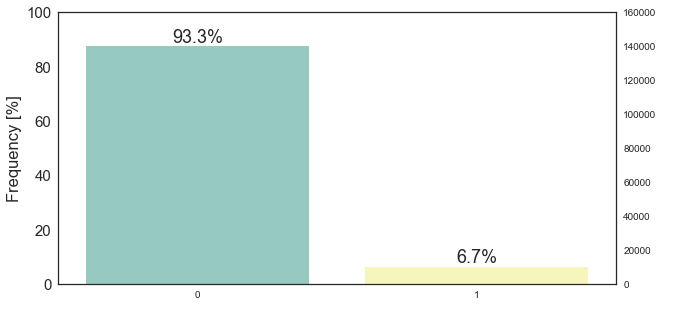

In [13]:

# plot
ax = sns.countplot(x = data.SeriousDlqin2yrs ,palette="Set3")
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)

add_freq()

plt.show()

# La muestra esta claramente desbalanceada.

#### 2) Variable RevolvingUtilizationOfUnsecuredLines.

In [14]:
data.sort_values("RevolvingUtilizationOfUnsecuredLines", ascending = False).head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
85489,0,50708.0,55,0,0.221757,38000.0,7,0,2,0,0.0
31414,0,29110.0,58,0,0.402560,10000.0,7,0,1,0,0.0
16956,0,22198.0,38,0,2312.000000,NaN,5,0,2,0,0.0
149160,0,22000.0,38,0,1.080020,3973.0,7,0,2,0,3.0
149279,0,20514.0,42,0,0.062102,9902.0,1,1,0,0,2.0
117315,0,18300.0,45,0,0.221582,12500.0,5,0,1,0,2.0
21978,0,17441.0,51,1,0.354072,14770.0,14,0,2,0,0.0
124533,0,13930.0,45,0,4902.000000,NaN,4,0,2,0,0.0
72592,0,13498.0,38,0,0.347428,4800.0,6,0,1,0,2.0
71705,0,13400.0,43,0,0.995801,5000.0,11,0,1,0,1.0


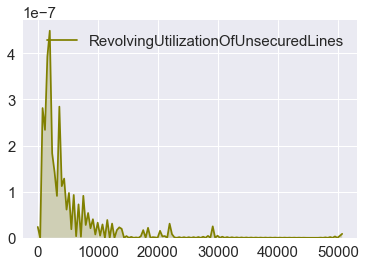

In [15]:
sns.kdeplot(data['RevolvingUtilizationOfUnsecuredLines'], shade=True, bw=.5, color="olive")


#### 3) Variable Age.

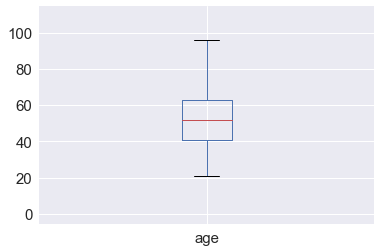

In [16]:
# distribución de la variable edad.
data.age.plot.box()

In [17]:
# Hay un outlier en cero.
# Comprobamos en el rango de edad 16 - 30, el número de personas menores de cada una de esas edades.
# Confirmamos que la edad mínima es 22.
for i in range(16,30):
    print (i, len(data[data.age < i]))

16 1
17 1
18 1
19 1
20 1
21 1
22 184
23 618
24 1259
25 2075
26 3028
27 4221
28 5559
29 7119


- alternativa

age_working = train_data.loc[(train_data["age"] >= 18) & (train_data["age"] < 60)]
age_senior = train_data.loc[(train_data["age"] >= 60)]

age_working_impute = age_working.MonthlyIncome.mean()
age_senior_impute = age_senior.MonthlyIncome.mean()

#### 4, 8 y 10) Variables NumberOfTimes90DaysLate, NumberofTime60-89DaysPastDueNotWorse, NumberofTime30-59DaysPasDueNotWorse.

In [18]:
Counter(data.NumberOfTime3059DaysPastDueNotWorse,)

Counter({2: 4598,
         0: 126018,
         1: 16033,
         3: 1754,
         4: 747,
         5: 342,
         7: 54,
         10: 4,
         6: 140,
         98: 264,
         12: 2,
         8: 25,
         9: 12,
         96: 5,
         13: 1,
         11: 1})

In [19]:
data.sort_values("NumberOfTime3059DaysPastDueNotWorse", ascending = False).head(10)

# Vemos como efectivamente los valores anormalmente altos son iguales para las tres variables. 
# En muchos casos se corresponden con postivios en  SeriousDlqin2yrs. 
# Encontramos entre estas observaciones numeros NaN para MonthlyIncome.

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
71627,1,1.0,24,98,0.000000,NaN,0,98,0,98,NaN
124987,1,1.0,42,98,0.000000,3830.0,0,98,0,98,0.0
62314,0,1.0,50,98,37.000000,NaN,0,98,0,98,0.0
40606,0,1.0,24,98,0.000000,3345.0,0,98,0,98,0.0
29325,1,1.0,28,98,0.033708,1245.0,0,98,0,98,0.0
106060,1,1.0,42,98,0.000000,3200.0,0,98,0,98,1.0
40398,0,1.0,27,98,0.000000,NaN,0,98,0,98,0.0
29563,0,1.0,22,98,0.000000,NaN,0,98,0,98,0.0
57202,1,1.0,79,98,0.005343,1122.0,0,98,0,98,0.0
101959,1,1.0,23,98,0.000000,NaN,0,98,0,98,0.0


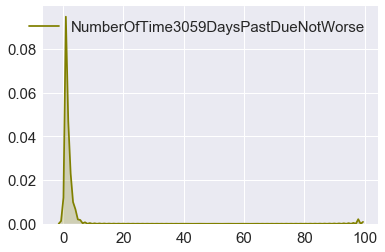

In [20]:
# La distribución de las variables es muy similar. 
# Recordamos que la correlación lineal entre las tres variables es muy cercana a 1.
# Consideramos reducir las variables a una sola, para evitar precisamente la multicolinealidad.

# NumberOfTime3059DaysPastDueNotWorse
sns.kdeplot(data['NumberOfTime3059DaysPastDueNotWorse'], shade=True, bw=.5, color="olive")


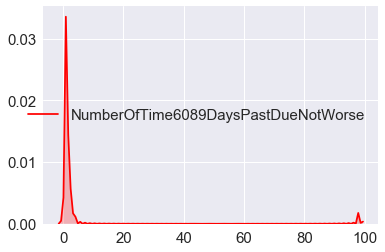

In [21]:
# NumberOfTime6089DaysPastDueNotWorse
sns.kdeplot(data['NumberOfTime6089DaysPastDueNotWorse'], shade=True, bw=.5, color="red")


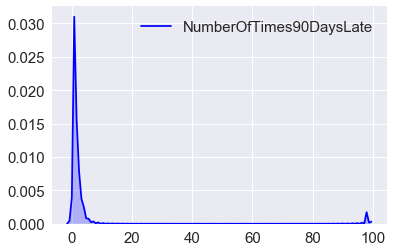

In [22]:
# NumberOfTimes90DaysLate
sns.kdeplot(data['NumberOfTimes90DaysLate'], shade=True, bw=.5, color="blue")


#### 5) Variable DebtRatio.

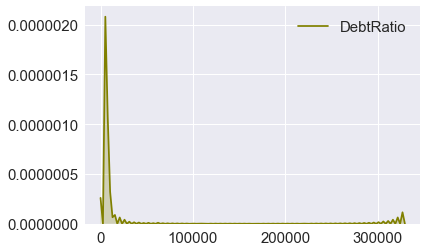

In [23]:
# Nuevamente vemos valores extremos.
sns.kdeplot(data['DebtRatio'], shade=True, bw=.5, color="olive")

In [24]:
# Observamos que los valores extremadamente altos en DebtRatio se corresponde con observaciones que no tienen MonthlyIncome (NaN) o es cercano a cero.
data.sort_values("DebtRatio", ascending = False).head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
60152,0,0.000000,65,0,329664.0,NaN,9,0,3,0,0.0
36600,0,0.001782,65,0,326442.0,NaN,6,0,1,0,0.0
127047,0,0.034290,58,1,307001.0,NaN,16,0,4,0,2.0
58900,0,0.182640,37,0,220516.0,NaN,8,0,3,0,NaN
4854,0,0.000000,56,0,168835.0,NaN,10,0,3,0,2.0
7513,0,0.152293,71,0,110952.0,NaN,9,0,0,0,0.0
103041,0,0.364845,65,0,106885.0,NaN,8,0,4,0,NaN
69845,0,0.386451,66,0,101320.0,NaN,12,0,0,0,0.0
66785,0,1.000000,63,0,61907.0,NaN,13,0,6,0,0.0
53682,0,1.000000,89,0,61106.5,1.0,2,0,0,0,0.0


#### 6) MonthlyIncome. Test.

In [25]:
# Visualización de histogramas sin valores NAN. 
data_income_na = data.dropna(axis=0, subset=['MonthlyIncome'])
data_income_na["SeriousDlqin2yrs"].value_counts()

0    111912
1      8357
Name: SeriousDlqin2yrs, dtype: int64

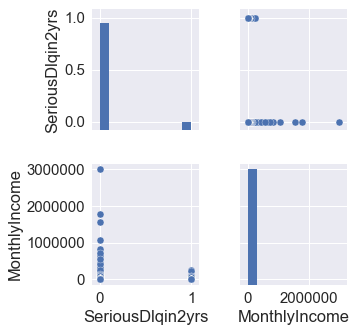

In [26]:
data_past_due_hist = data_income_na[['SeriousDlqin2yrs',"MonthlyIncome"]]
sns.pairplot(data_past_due_hist)
# Los valores income más altos son negativos en la variable SeriousDlqin2yrs.

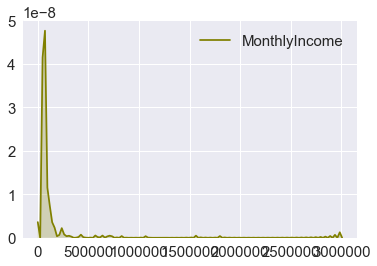

In [27]:
# La distribución de monthlyincome tiene valores muy extremos en los ingresos más altos.
# Se han eliminados NaN values.
# Puede resultar apropiado discretizar la variable.
sns.kdeplot(data_income_na['MonthlyIncome'], shade=True, bw=.5, color="olive")

#### 7 y 9) variables NumberOfOpenCreditLinesAndLoans y NumberRealEstateLoansOrLines.

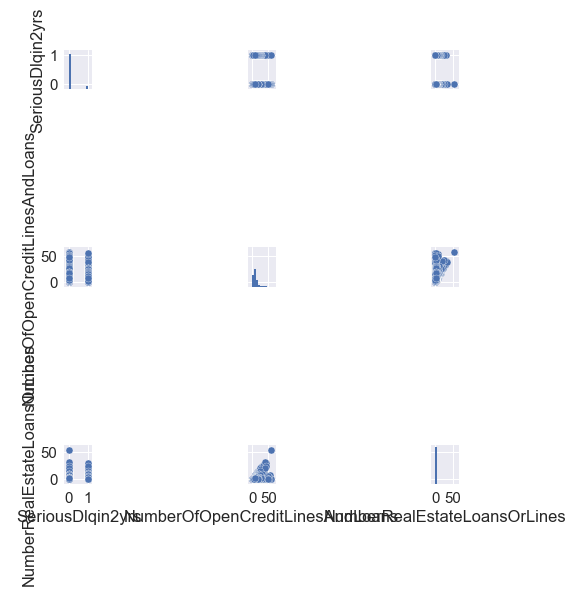

In [28]:
data_past_due_hist = data[['SeriousDlqin2yrs',"NumberOfOpenCreditLinesAndLoans","NumberRealEstateLoansOrLines"]]
sns.pairplot(data_past_due_hist)
# Observamos:
# NumberOfOpenCreditLinesAndLoans: Número de de líneas de crédito abiertas se distribuye entre 0 y 25 principalmente. La moda es distintas de cero.
# NumberRealEstateLoansOrLines: Principalmente cero. Probable presencia de outliers.
# Se aprecia cierta correlación entre ambas variables.
# No tienen una distribución significativamente distintas para casos positivos y negativos de SeriousDlqin2yrs


#### 11) Variable NumberOfDependents.

In [29]:
# Visualización de histogramas sin valores NAN. 
data_income_na = data.dropna(axis=0, subset=['NumberOfDependents'])

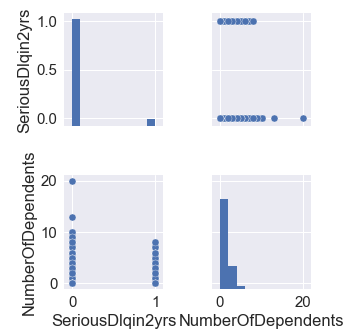

In [30]:
data_past_due_hist = data_income_na[['SeriousDlqin2yrs',"NumberOfDependents"]]
sns.pairplot(data_past_due_hist)
# La variable NumberOfDependents se distribuye entre 0 y 20. Los valores cero y cercanos a cero tienen una frecuencia muy significativa que desciende rápidamente.

#### Análisis exploratorio test

C:\Users\Alvaro_2\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


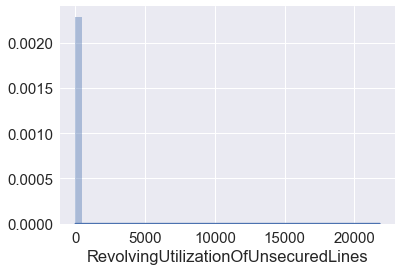

C:\Users\Alvaro_2\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


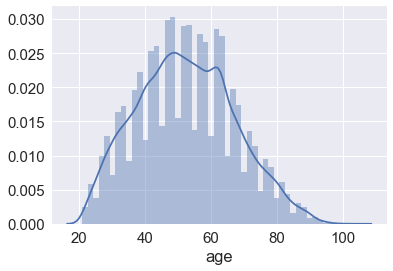

C:\Users\Alvaro_2\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


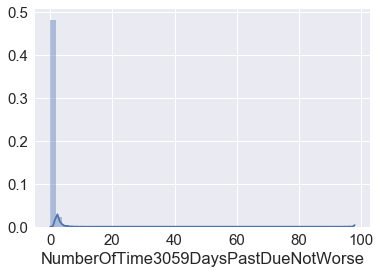

C:\Users\Alvaro_2\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


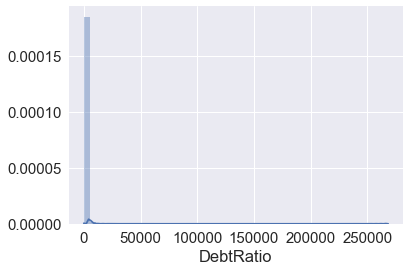

C:\Users\Alvaro_2\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


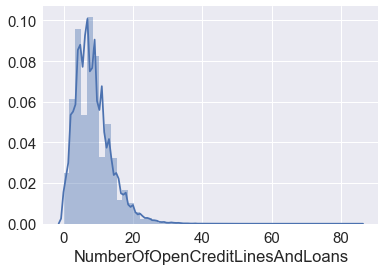

C:\Users\Alvaro_2\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


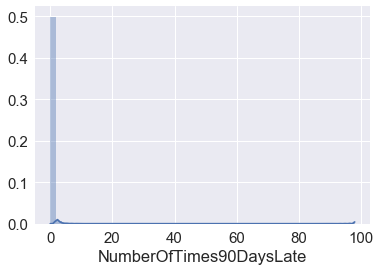

C:\Users\Alvaro_2\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


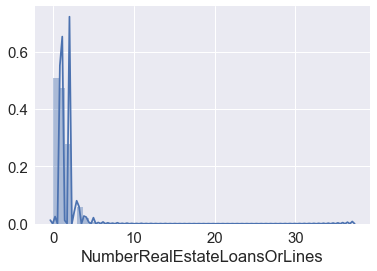

C:\Users\Alvaro_2\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


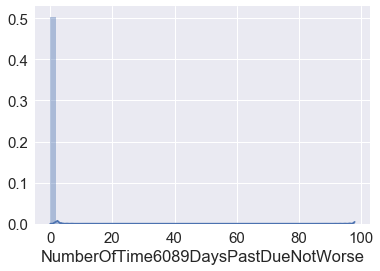

In [31]:
feature_list=list(data_test.columns.values)
remove_list = ["SeriousDlqin2yrs",'MonthlyIncome','NumberOfDependents']
for each in remove_list:
    feature_list.remove(each)

for each in feature_list:
    sns.distplot(data_test[each])
    plt.show()

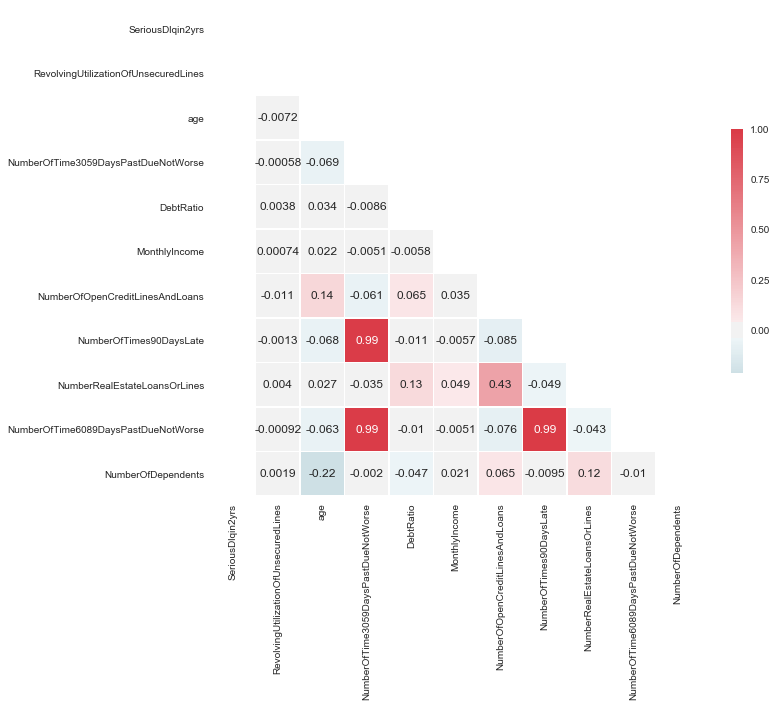

In [32]:
sns.set(style="white")

# Compute the correlation matrix #Se llaman igual el corr de training que el de test, ojo.
corr = data_test.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### 1) Variable SeriousDlqin2yrs. Test.

Esta es la variable que debemos predecir.

#### 2) Variable RevolvingUtilizationOfUnsecuredLines. Test.

In [33]:
data_test.sort_values("RevolvingUtilizationOfUnsecuredLines", ascending = False).head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
39197,1,21821.0,60,0,0.842063,2500.0,4,0,2,0,0.0
50507,1,16175.0,49,0,0.823324,3429.0,5,0,1,0,3.0
97705,1,16049.0,46,0,2313.000000,NaN,3,0,1,0,0.0
79093,1,15628.0,41,0,0.443538,8208.0,9,0,2,0,0.0
32555,1,13066.0,65,0,3922.000000,NaN,4,0,2,0,0.0
3369,1,11969.0,45,0,0.299986,6916.0,5,0,1,0,1.0
9386,1,11949.0,42,0,0.048985,37500.0,9,0,0,0,0.0
84439,1,11899.0,45,2,2712.000000,NaN,5,0,1,0,4.0
21512,1,11449.0,33,1,2.386979,4100.0,12,0,4,0,2.0
21913,1,11214.0,35,0,0.586603,4000.0,7,0,1,0,1.0


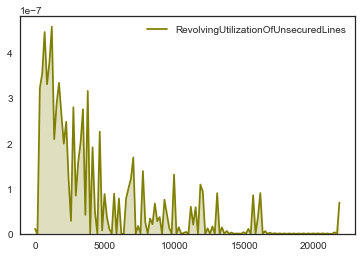

In [34]:
sns.kdeplot(data_test['RevolvingUtilizationOfUnsecuredLines'], shade=True, bw=.5, color="olive")


#### 3) Variable Age. Test.

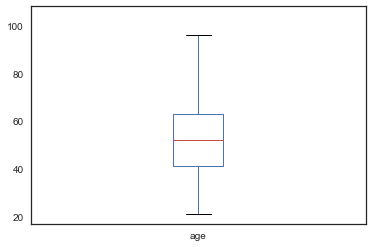

In [35]:
# distribución de la variable edad.
data_test.age.plot.box()

In [36]:

# Comprobamos en el rango de edad 16 - 30, el número de personas menores de cada una de esas edades. No hay outliers

for i in range(16,30):
    print (i, len(data_test[data_test.age < i]))

16 0
17 0
18 0
19 0
20 0
21 0
22 147
23 427
24 861
25 1398
26 2036
27 2788
28 3719
29 4763


#### 4, 8 y 10) Variables NumberOfTimes90DaysLate, NumberofTime60-89DaysPastDueNotWorse, NumberofTime30-59DaysPasDueNotWorse. Test.

In [37]:
# mismo patrón que en la parte de test
Counter(data_test.NumberOfTime3059DaysPastDueNotWorse,)

Counter({0: 85190,
         1: 10837,
         98: 213,
         2: 3168,
         4: 510,
         3: 1201,
         8: 28,
         5: 205,
         6: 88,
         7: 42,
         9: 10,
         10: 7,
         96: 1,
         12: 1,
         11: 1,
         19: 1})

In [38]:
# al igual que en el training dataset las frecuencias anormalmentes altas para una variable, lo son para las demás.

data_test.sort_values("NumberOfTime3059DaysPastDueNotWorse", ascending = False).head(10)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
2265,1,1.0,21,98,0.0,2088.0,0,98,0,98,0.0
10292,1,1.0,26,98,0.0,NaN,0,98,0,98,0.0
17121,1,1.0,25,98,0.0,NaN,0,98,0,98,0.0
43217,1,1.0,50,98,0.0,2600.0,0,98,0,98,1.0
87222,1,1.0,22,98,0.0,1300.0,0,98,0,98,0.0
1166,1,1.0,21,98,0.0,NaN,0,98,0,98,NaN
5108,1,1.0,24,98,0.0,NaN,0,98,0,98,0.0
65095,1,1.0,39,98,0.0,3000.0,0,98,0,98,2.0
78877,1,1.0,56,98,0.0,NaN,0,98,0,98,0.0
1176,1,1.0,25,98,0.0,2935.0,0,98,0,98,0.0


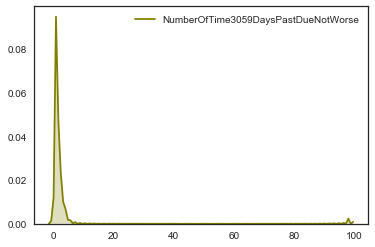

In [39]:
# NumberOfTime3059DaysPastDueNotWorse
sns.kdeplot(data_test['NumberOfTime3059DaysPastDueNotWorse'], shade=True, bw=.5, color="olive")


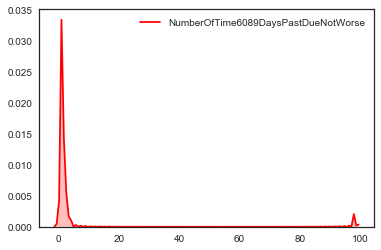

In [40]:
# NumberOfTime6089DaysPastDueNotWorse
sns.kdeplot(data_test['NumberOfTime6089DaysPastDueNotWorse'], shade=True, bw=.5, color="red")


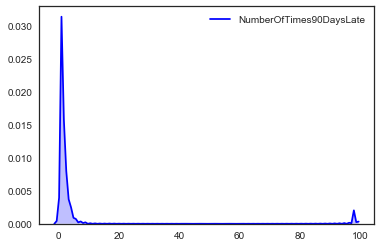

In [41]:
# NumberOfTimes90DaysLate
sns.kdeplot(data_test['NumberOfTimes90DaysLate'], shade=True, bw=.5, color="blue")


#### 5) Variable DebtRatio. Test.

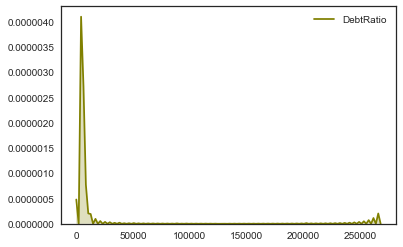

In [42]:
# Nuevamente vemos valores extremos.
sns.kdeplot(data_test['DebtRatio'], shade=True, bw=.5, color="olive")

In [43]:
data_test.sort_values("DebtRatio", ascending = False).head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
49845,1,0.032620,51,0,268326.0,NaN,12,0,1,0,2.0
30511,1,0.071467,55,0,202990.0,0.0,16,0,0,0,0.0
67717,1,0.013504,81,0,128992.0,NaN,29,0,1,0,0.0
14626,1,0.000000,75,0,95713.0,0.0,11,0,0,0,0.0
86772,1,0.000000,95,0,87853.0,0.0,3,0,0,0,0.0
32407,1,0.000000,45,0,49944.0,NaN,3,0,1,0,0.0
85014,1,0.675336,60,6,44826.0,NaN,19,0,1,0,0.0
100482,1,0.001937,70,0,40066.0,0.0,11,0,0,0,0.0
15139,1,0.000000,50,2,37780.0,NaN,24,0,11,0,3.0
31278,1,0.789070,58,3,37029.0,NaN,12,2,1,2,0.0


#### 6) MonthlyIncome. Test.

C:\Users\Alvaro_2\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Alvaro_2\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


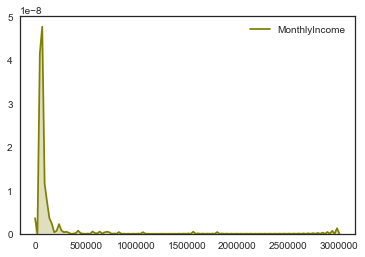

In [44]:
# La distribución de monthlyincome tiene valores muy extremos en los ingresos más altos.
# Se han eliminados NaN values.
# Puede resultar apropiado discretizar la variable.
sns.kdeplot(data_income_na['MonthlyIncome'], shade=True, bw=.5, color="olive")

#### 7 y 9) variables NumberOfOpenCreditLinesAndLoans y NumberRealEstateLoansOrLines. Test.

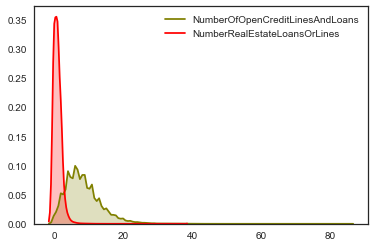

In [45]:
# distribuciones similares a las de training
sns.kdeplot(data_test['NumberOfOpenCreditLinesAndLoans'], shade=True, bw=.5, color="olive")
sns.kdeplot(data_test['NumberRealEstateLoansOrLines'], shade=True, bw=.5, color="red")

#### 11) Variable NumberOfDependents. Test.

In [46]:
# Visualización de histogramas sin valores NAN. 
data_income_na = data_test.dropna(axis=0, subset=['NumberOfDependents'])

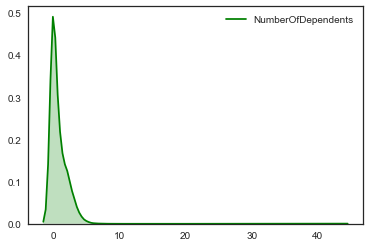

In [47]:
# algunos outliers más significativos que en la muestra de entrenamiento.
sns.kdeplot(data_income_na['NumberOfDependents'], shade=True, bw=.5, color="green")

- guardamos el dataset

In [48]:
%store data_test


Stored 'data_test' (DataFrame)


- guardamos el dataset de train


In [49]:
%store data

Stored 'data' (DataFrame)
